In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
from network import Network, TargetNetwork
from layer import LowPassFilter

In [11]:
np.random.seed(seed=0)
network = Network()

save_dir = "saved"
#network.load(save_dir)

In [12]:
network.set_target_prediction_mode()

dt = 0.1
lp_filter = LowPassFilter(dt, 3)

target_values = np.random.rand(10)
values = np.random.rand(30)

train_iteration = 200

erros = []

u_targets = []
u_outputs = []

for i in range(train_iteration):
    for j in range(1000):
        filtered_values = lp_filter.process(values)
        network.set_target_firing_rate(target_values)
        network.set_input_firing_rate(filtered_values)
        network.update(dt)
            
        error = np.mean(network.layers[1].v_p_a)
        u_target = network.layers[2].u_target
        u_p = network.layers[2].u_p
        
        erros.append(error)
        u_targets.append(u_target)
        u_outputs.append(u_p)

network.clear_target()

for i in range(100):
    for j in range(1000):
        filtered_values = lp_filter.process(values)
        network.set_input_firing_rate(filtered_values)
        network.update(dt)
        
        u_p = network.layers[2].u_p
        u_outputs.append(u_p)
        
u_targets = np.array(u_targets)
u_outputs = np.array(u_outputs)

# Save weights
network.save(save_dir)

saved: saved


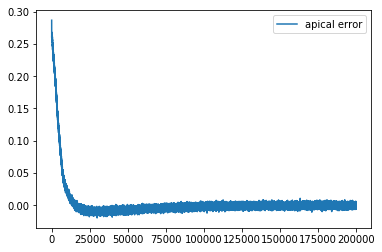

In [13]:
plt.plot(erros, label="apical error")
plt.legend()
plt.show()

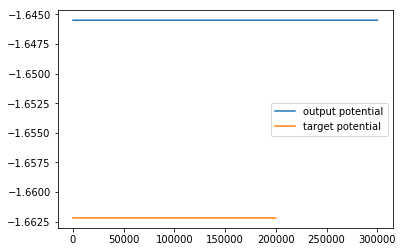

In [29]:
check_index = 8
plt.plot(u_outputs[:,check_index], label="output potential")
plt.plot(u_targets[:,check_index], label="target potential")
#plt.ylim(-1.3, 1.3)
plt.legend()
plt.show()

In [30]:
np.random.seed(seed=0)
network = Network()

save_dir = "saved"
network.load(save_dir)

weight loaded: saved/layer0.npz
weight loaded: saved/layer1.npz
loaded: saved


## Check with newly loaded network

In [31]:
network.set_target_prediction_mode()

dt = 0.1
lp_filter = LowPassFilter(dt, 3)

check_u_targets = []
check_u_outputs = []

for j in range(1000):
    filtered_values = lp_filter.process(values)
    network.set_input_firing_rate(filtered_values)
    network.update(dt)
        
    u_p = network.layers[2].u_p
    check_u_outputs.append(u_p)
        
check_u_targets = np.array(u_targets)
check_u_outputs = np.array(u_outputs)

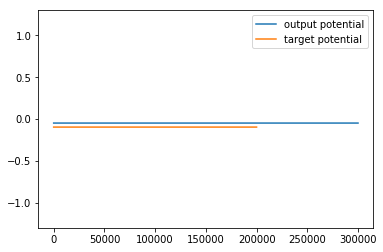

In [40]:
check_index = 1
plt.plot(check_u_outputs[:,check_index], label="output potential")
plt.plot(check_u_targets[:,check_index], label="target potential")
plt.ylim(-1.3, 1.3)
plt.legend()
plt.show()

In [42]:
data_file_path = "saved/layer1.npz"
data = np.load(data_file_path)

w_pp_bu_1 = data["w_pp_bu"] # (10, 20)
w_pp_td_1 = data["w_pp_td"] # (20, 10)
w_ip_1    = data["w_ip"] # (10,20)
w_pi_1    = data["w_pi"] # (20,10)

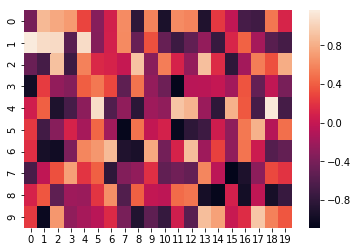

In [46]:
sns.heatmap(w_pp_bu_1)
plt.show()

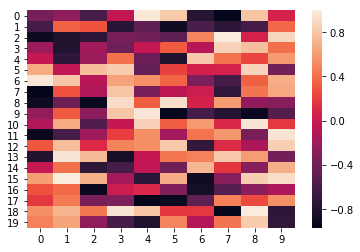

In [47]:
sns.heatmap(w_pp_td_1) # 固定
plt.show()

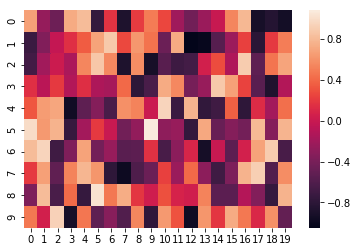

In [43]:
sns.heatmap(w_ip_1)
plt.show()

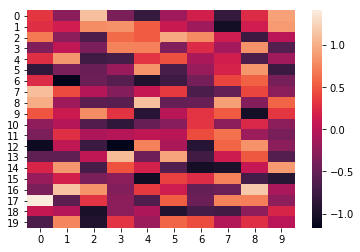

In [44]:
sns.heatmap(w_pi_1)
plt.show()

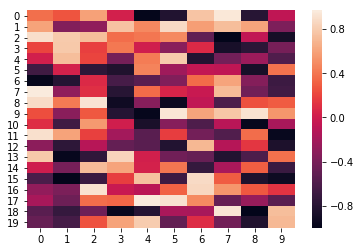

In [51]:
sns.heatmap(-w_pp_td_1) # 固定, w_ipとマイナスの関係に近くなっているか？
plt.show()

In [52]:
data_file_path = "saved/layer0.npz"
data = np.load(data_file_path)
w_pp_bu_0 = data["w_pp_bu"]
w_pp_td_0 = data["w_pp_td"]

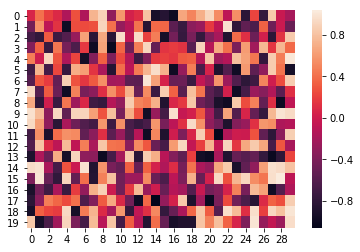

In [53]:
sns.heatmap(w_pp_bu_0) # 学習対象
plt.show()

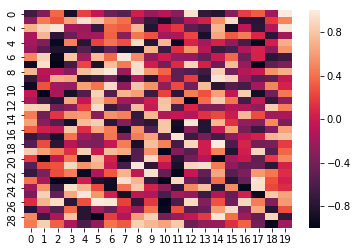

In [54]:
sns.heatmap(w_pp_td_0) # 固定
plt.show()